In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

In [6]:
np.random.seed(42)
X=np.random.rand(2000,15)
y=np.random.randint(2, size=(2000, 1))

In [14]:
model = Sequential([
    Input(shape=(15,)),  
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid") 
])

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
model.fit(X,y, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5054 - loss: 0.6957
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5325 - loss: 0.6901
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5335 - loss: 0.6892
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5105 - loss: 0.6911
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 0.6885
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5572 - loss: 0.6834
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5727 - loss: 0.6806
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5567 - loss: 0.6797
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5605 - loss: 0.6757
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 0.6812
Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5756 - loss: 0.6723
Epoch 12/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5957 - lo

In [20]:
models.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
x_test=np.random.rand(15,15)
y_test=model.predict(x_test)
print(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
[[0.5341208 ]
 [0.5467127 ]
 [0.45225084]
 [0.47622094]
 [0.6305662 ]
 [0.49757087]
 [0.46394086]
 [0.48943546]
 [0.58927697]
 [0.46269143]
 [0.6248902 ]
 [0.48478168]
 [0.45715845]
 [0.49506032]
 [0.53229904]]


using dropout , Batchnormalization,earlystopping

In [22]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
np.random.seed(42)
X_train=np.random.rand(5000,10)
y=np.random.randint(2, size=(5000, 1))

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [45]:
model = Sequential([
    Input(shape=(10,)),  
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation="sigmoid") 
])

In [46]:
optimizers=Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizers, loss="binary_crossentropy", metrics=["accuracy"]) 

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [48]:
history = model.fit(X_train, y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4821 - loss: 0.9468 - val_accuracy: 0.4880 - val_loss: 0.7262
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5069 - loss: 0.7830 - val_accuracy: 0.4840 - val_loss: 0.7163
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5094 - loss: 0.7425 - val_accuracy: 0.4920 - val_loss: 0.7092
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5088 - loss: 0.7293 - val_accuracy: 0.5060 - val_loss: 0.7064
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5026 - loss: 0.7181 - val_accuracy: 0.4840 - val_loss: 0.7033
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4954 - loss: 0.7201 - val_accuracy: 0.4940 - val_loss: 0.7013
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5193 - loss: 0.7047 - val_accuracy: 0.4870 - val_loss: 0.7007
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5097 - loss: 0.7014 - val_accuracy: 

In [49]:
import matplotlib.pyplot as plt

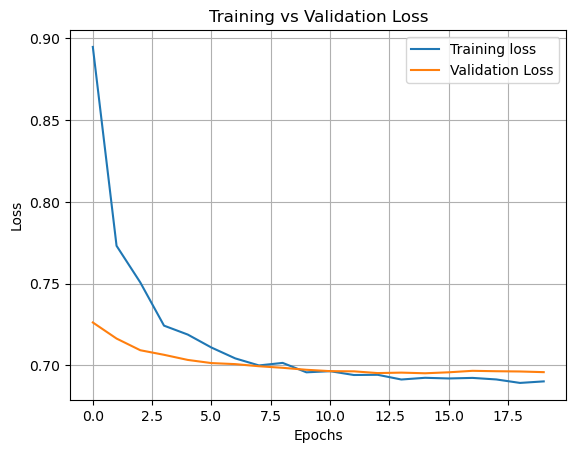

In [52]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [51]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
if final_train_loss > 0.5 and final_val_loss > 0.5:
    print("Both Training and Validation loss are high. Model might be underfitting.")


Both Training and Validation loss are high. Model might be underfitting.
